#### 1. What is the approximate depth of a Decision Tree trained (without restrictions) on a training set with one million instances?
Book answer: The depth of a well-balanced binary tree containing m leaves is equal to $log_2(m)$, rounded up. A binary Decision Tree (one that makes only binary decisions, as is the case with all trees in Scikit-Learn) will end up more or less well balanced at the end of training, with one leaf per training instance if it is trained without
restrictions. Thus, if the training set contains one million instances, the Decision Tree will have a depth of $log_2 (10⁶) \sim 20$  (actually a bit more since the tree will generally not be perfectly well balanced).

#### 2. Is a node’s Gini impurity generally lower or greater than its parent’s? Is it generally lower/greater, or always lower/greater?
It is generally lower.
Book answer: A node’s Gini impurity is generally lower than its parent’s. This is due to the CART training algorithm’s cost function, which splits each node in a way that minimizes the weighted sum of its children’s Gini impurities. However, it is possible for a node to have a higher Gini impurity than its parent, as long as this
increase is more than compensated for by a decrease in the other child’s impurity. For example, consider a node containing four instances of class A and one of class B. Its Gini impurity is 1 – (1/5)^2 – (4/5)^2 = 0.32. Now suppose the dataset is one-dimensional and the instances are lined up in the following order: A, B, A,
A, A. You can verify that the algorithm will split this node after the second instance, producing one child node with instances A, B, and the other child node with instances A, A, A. The first child node’s Gini impurity is 1 – (1/2)^2 – (1/2)^2 = 0.5, which is higher than its parent’s. This is compensated for by the fact that the
other node is pure, so its overall weighted Gini impurity is 2/5 × 0.5 + 3/5 × 0 = 0.2, which is lower than the parent’s Gini impurity.

#### 3. If a Decision Tree is overfitting the training set, is it a good idea to try decreasing max_depth ?

No. max_depth should be decreased to increase regularization. A max_depth too excessive will produce larger trees and have a tendency to overfit.

#### 4. If a Decision Tree is underfitting the training set, is it a good idea to try scaling the input features?

Scaling the features should have no impact on the level of regularization. In the case of underfitting (high bias), it is recommended to decrease the min_* and increase the max_* hyperparameters. (Example: increase max_depth, decrease min_samples_split).

#### 5. If it takes one hour to train a Decision Tree on a training set containing 1 million instances, roughly how much time will it take to train another Decision Tree on a training set containing 10 million instances?

The trainining computational complexity is of the order of $O(m.n.log_2(m))$. Therefore, training on $10^7$ instances instead of $10^6$ will take $10^7.log_2(10^7)/(10⁶.log_2(10⁶)) = 10.7.log_2(10)/(6.log_2(10)) = 70/6 \sim 11.67$ times longer.

#### 6. If your training set contains 100,000 instances, will setting presort=True speed up training?

No. Presorting may speed up training for only small datasets (few thousands max).

## Exercise 7

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_moons

import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
X, y = make_moons(n_samples=10000, noise=0.4, random_state=42)

In [4]:
y

array([1, 0, 0, ..., 1, 0, 1])

In [6]:
X[:,0]

array([ 0.9402914 ,  0.12454026,  0.26198823, ..., -0.24177973,
        0.90679645,  2.08837082])

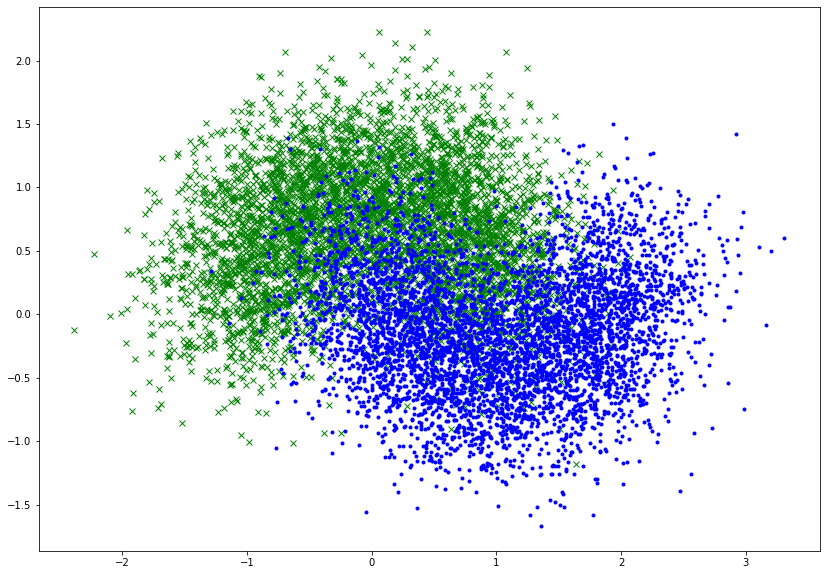

In [17]:
plt.figure(figsize=(14,10))
plt.plot(X[(y == 0),0], X[(y==0),1], 'gx')
plt.plot(X[(y == 1),0], X[(y==1),1], 'b.')


In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [23]:
params = {'max_depth':[2,4,6,8,10], 'max_leaf_nodes':[2,4,6]}

tree = DecisionTreeClassifier()

grd_srch = GridSearchCV(tree, params, cv=3, scoring='accuracy', verbose=3)

In [24]:
grd_srch.fit(X_train, y_train)

Fitting 3 folds for each of 15 candidates, totalling 45 fits
[CV 1/3] END .....max_depth=2, max_leaf_nodes=2;, score=0.754 total time=   0.0s
[CV 2/3] END .....max_depth=2, max_leaf_nodes=2;, score=0.783 total time=   0.0s
[CV 3/3] END .....max_depth=2, max_leaf_nodes=2;, score=0.777 total time=   0.0s
[CV 1/3] END .....max_depth=2, max_leaf_nodes=4;, score=0.842 total time=   0.0s
[CV 2/3] END .....max_depth=2, max_leaf_nodes=4;, score=0.859 total time=   0.0s
[CV 3/3] END .....max_depth=2, max_leaf_nodes=4;, score=0.856 total time=   0.0s
[CV 1/3] END .....max_depth=2, max_leaf_nodes=6;, score=0.842 total time=   0.0s
[CV 2/3] END .....max_depth=2, max_leaf_nodes=6;, score=0.859 total time=   0.0s
[CV 3/3] END .....max_depth=2, max_leaf_nodes=6;, score=0.856 total time=   0.0s
[CV 1/3] END .....max_depth=4, max_leaf_nodes=2;, score=0.754 total time=   0.0s
[CV 2/3] END .....max_depth=4, max_leaf_nodes=2;, score=0.783 total time=   0.0s
[CV 3/3] END .....max_depth=4, max_leaf_nodes=2;

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 4, 6, 8, 10],
                         'max_leaf_nodes': [2, 4, 6]},
             scoring='accuracy', verbose=3)

In [25]:
grd_srch.best_params_

{'max_depth': 2, 'max_leaf_nodes': 4}

In [26]:
grd_srch.best_estimator_

DecisionTreeClassifier(max_depth=2, max_leaf_nodes=4)

In [27]:
tree = grd_srch.best_estimator_

In [28]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, max_leaf_nodes=4)

In [29]:
y_pred = tree.predict(X_test)

In [30]:
sum(y_pred == y_test)/len(y_test)

0.863

## Exercise 8

In [45]:
from sklearn.model_selection import ShuffleSplit

split = ShuffleSplit(n_splits=1000, train_size=100, random_state=42)

In [46]:
split.get_n_splits(X_train)

1000

In [50]:
X_indexes = np.zeros((1000, 100), dtype='int')


X_indexes

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [51]:
for i, (train_index, test_index) in enumerate(split.split(X_train)):
    X_indexes[i] = train_index

In [59]:
len(X_indexes)

1000

In [63]:
acc = 0
for i in range(len(X_indexes)):
    tree.fit(X_train[X_indexes[i],:], y_train[X_indexes[i]])
    y_pred = tree.predict(X_test)
    print(sum(y_pred == y_test)/len(y_test))
    acc += sum(y_pred == y_test)/len(y_test)

0.8205
0.865
0.8615
0.864
0.8675
0.848
0.7775
0.864
0.8585
0.8445
0.86
0.8475
0.825
0.855
0.769
0.8595
0.8125
0.8485
0.8195
0.846
0.8585
0.862
0.8015
0.86
0.863
0.861
0.853
0.865
0.8435
0.855
0.7595
0.846
0.859
0.7845
0.8445
0.843
0.8385
0.7605
0.853
0.865
0.835
0.8565
0.871
0.77
0.8425
0.8525
0.7735
0.78
0.811
0.8205
0.85
0.834
0.794
0.8075
0.8515
0.8265
0.8255
0.843
0.7755
0.8155
0.7955
0.846
0.8015
0.822
0.8575
0.8555
0.8525
0.8045
0.872
0.84
0.8665
0.832
0.776
0.8555
0.86
0.839
0.86
0.8385
0.821
0.779
0.812
0.817
0.8485
0.8405
0.755
0.781
0.791
0.8275
0.846
0.781
0.8425
0.8575
0.8295
0.8185
0.829
0.8235
0.831
0.792
0.8015
0.829
0.7665
0.8415
0.8565
0.8485
0.8615
0.847
0.8545
0.8335
0.8075
0.862
0.8305
0.864
0.829
0.8595
0.8595
0.7785
0.852
0.8275
0.8115
0.7745
0.847
0.784
0.857
0.855
0.864
0.858
0.858
0.837
0.753
0.8345
0.8175
0.8325
0.8655
0.781
0.754
0.838
0.8025
0.812
0.8605
0.819
0.865
0.8595
0.7715
0.8545
0.816
0.832
0.831
0.8505
0.859
0.863
0.849
0.799
0.8595
0.8505
0.862
0.6

In [65]:
acc/1000

0.8316070000000015

In [67]:
y_pred = np.zeros((len(y_test),1), dtype='int')
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [68]:
len(y_pred)

2000

In [87]:
tree.fit(X_train[X_indexes[0],:], y_train[X_indexes[0]])
y_pred = tree.predict(X_test)

for i in range(1,len(X_indexes)):
    tree.fit(X_train[X_indexes[i],:], y_train[X_indexes[i]])
    y_pred = np.vstack((y_pred,tree.predict(X_test)))
   

In [91]:
len(y_pred[:,0])

1000

In [92]:
import scipy as sp
from scipy.stats import mode

In [141]:
most_pred , b = mode(y_pred)

In [147]:
sum (most_pred[0] == y_test)/len(y_test)

0.869